# Sortwanie szybkie
## Opis algorytmu
Jest to algorytm sortujący. Sortuje on dane poprzez wybranie pewnej liczby z tablicy, a następnie przekładanie liczb w tej tablicy tak aby po lewej stronie znalazły się liczby mniejsze od wybranej a po prawej większe. Następnie wykonuje tą samą operację dla tablicy po lewej i po prawej stronie.
## Kod

In [12]:
# Zwraca indeks taki że, po lewej stronie są wartości mniejsze od niego, a po prawej większe.
def partition(tab, low, high):
    # Wybieram indeks high jako wartość względem której będę porównywał elementy i nazwę ją pivot.
    pivot = tab[high]
    # mid to indeks pivot, za którym będą znajdować się wartości większe od pivot.,
    # na początek ustawiam go na pierwszą wartość.
    mid = low
    # Dla każdego elementu w zakresie low-high
    for i in range(low, high):
        # Jeżeli wartość w tablicy jest mniejsza od pivot
        if tab[i] < pivot:
            # Zamieniam miejscami w tablicy obecną wartość z mid
            tab[i], tab[mid] = tab[mid], tab[i]
            # zwiększam mid o 1
            mid+=1
    tab[mid], tab[high] = tab[high], tab[mid]
    return mid
            
    
def quicksort(tab, low, high):
    if low < high:
        # Poprzekładaj tablicę względem ostatniego elementu
        mid = partition(tab,low,high)
        # Przekładaj lewą stronę tablicy
        quicksort(tab,low,mid-1)
        # Przekłądaj prawą stronę tablicy
        quicksort(tab,mid+1,high)

## Schematy blokowe
### Funkcja sortująca
![quicksort](Quicksort/Quicksort.png)
### Funkcja przestawiająca dane w tablicy
![quicksort](Quicksort/Partition.png)
## Analiza matematyczna
Złożoność tego algorytmu w dużej mierze zależy od tego względem której liczby będziemy dzielić i przestawiać tablicę. Możemy wyróżnić trzy przypadki:
### Przypadek pesymistyczny
Jako, że zawsze wybieramy ostatnią liczbę algorytm ten będzie dokonywał największej ilości porównań dla tablicy posortowanej tj. przejdzie po całej pętli i podzieli ją na dwie tablice, z czego pierwsza będzie zawierała wszystkie elementy oprócz ostatniego. Zatem wykona się ona $ (n-1) + (n-2) + ... + 2 + 1$ razy co daje w sumie $ S = \frac{1 + (n-1)}{2} * n = \frac{n^{2}}{2}$

### Pozostałe przypadki
W pozostałych przypadkach zakładamy, że trafiamy na liczę która jest w przybliżeniu medianą liczb sortowanych. Wtedy algorytm dzieli tablicę na dwie części i osiąga złożoność podobną do sortowania przez scalanie $ O(nlog{n}) $.

# Doświadczenia:
## Doświadczenie Q1
- Zakres liczb: -20-20,
- Ilość liczb: 10,
- Sposób wybierania: losowy

In [2]:
import random
tablica_przed_posortowaniem = [random.randrange(-20,21) for i in range(0,10)]

print("Przed posortowaniem: ")
print(tablica_przed_posortowaniem)

posort = list.copy(tablica_przed_posortowaniem)
quicksort(posort,0,len(posort)-1)

print("Sortowanie szybkie: ")
print(posort)

Przed posortowaniem: 
[15, 15, -8, 20, -6, 9, -18, 18, -13, 18]
Sortowanie szybkie: 
[-18, -13, -8, -6, 9, 15, 15, 18, 18, 20]


## Doświadczenie Q2
- Zakres liczb: -1000-1000,
- Ilość liczb: 10 000,
- Sposób wybierania: losowy,

In [13]:
import random
from timeit import default_timer as timer
tablica_przed_posortowaniem = [random.randrange(-1000,1001) for i in range(0,10000)]
posort = list.copy(tablica_przed_posortowaniem)

qstart = timer()
quicksort(posort,0,len(posort)-1)
qend = timer()

print("Sortowanie szybkie: "+str(qend - qstart)+ " sekund")

Sortowanie szybkie: 0.06789819999994506 sekund


## Doświadczenie Q3
- Zakres licznb: 1-1000,
- Ilość liczb: od 1 do 1000,
- Sposób wybierania: posortowane,

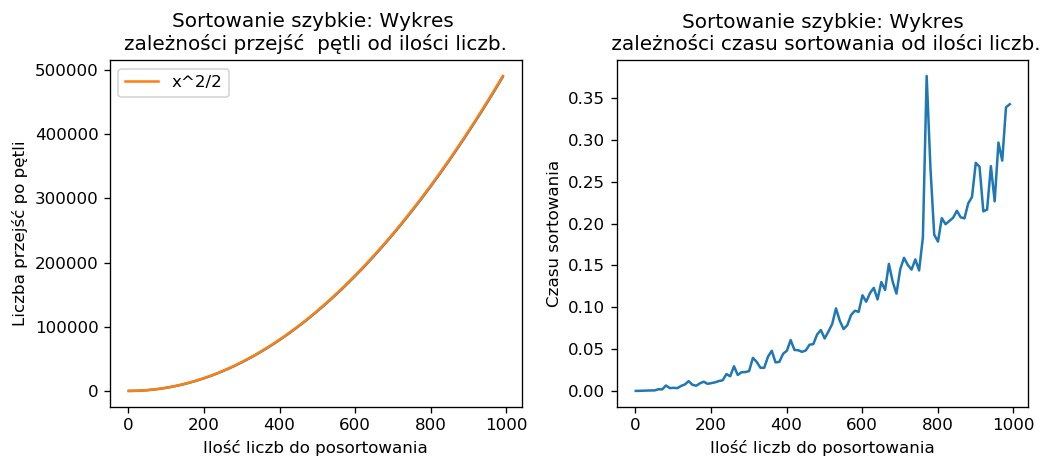

In [12]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib

# Zwraca indeks taki że, po lewej stronie są wartości mniejsze od niego, a po prawej większe.
def partition(tab, low, high):
    # Wybieram indeks high jako wartość względem której będę porównywał elementy i nazwę ją pivot.
    pivot = tab[high]
    # mid to indeks pivot, za którym będą znajdować się wartości większe od pivot.,
    #na początek ustawiam go na pierwszą wartość.s
    mid = low
    # Dla każdego elementu w zakresie low-high
    for i in range(low, high):
        global liczba_iteracji
        liczba_iteracji += 1
        # Jeżeli wartość w tablicy jest mniejsza od pivot
        if tab[i] < pivot:
            global liczba_zamian
            liczba_zamian +=1
            # Zamieniam miejscami w tablicy obecną wartość z mid
            tab[i], tab[mid] = tab[mid], tab[i]
            # zwiększam mid o 1
            mid+=1
    liczba_zamian+=1
    tab[mid], tab[high] = tab[high], tab[mid]
    return mid
            
    
def quicksort(tab, low, high):
    if low < high:
        mid = partition(tab,low,high)
        quicksort(tab,low,mid-1)
        quicksort(tab,mid+1,high)
        
        
def benchmark_3():
    lista_iteracji = []
    lista_zmian = []
    czasy = []
    ile = 1000
    rang = []
    for liczby in range(1,ile,10):
        global liczba_iteracji
        global liczba_zamian
        liczba_iteracji = 0
        liczba_zamian = 0
        tablica_przed_posortowaniem = [i for i in range(1,liczby)]
        posort = list.copy(tablica_przed_posortowaniem)

        rang.append(liczby)
        qstart = timer()
        quicksort(posort,0,len(posort)-1)
        qend = timer()
        
        lista_iteracji.append(liczba_iteracji)
        lista_zmian.append(liczba_zamian)
        czasy.append(qend - qstart)
        
    width_in_inches = 9
    height_in_inches =4
    dots_per_inch = 120
    
    f = lambda x: x*x/2
    xlogs = [f(x) for x in range(1, ile, 10)]

    plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    
    plt.subplot(1,2,1)
    plt.plot(rang, lista_iteracji)
    plt.plot(rang, xlogs, label="x^2/2")
    plt.title("Sortowanie szybkie: Wykres \nzależności przejść  pętli od ilości liczb.")
    plt.ylabel("Liczba przejść po pętli")
    plt.xlabel("Ilość liczb do posortowania")
    plt.legend(loc="best")
    
    plt.subplot(1,2,2)
    plt.plot(rang, czasy)
    plt.title("Sortowanie szybkie: Wykres\n zależności czasu sortowania od ilości liczb.")
    plt.ylabel("Czasy sortowania")
    plt.xlabel("Ilość liczb do posortowania")
    
    plt.tight_layout()
    plt.show()
    #print(lista_iteracji)
    #print(lista_zmian)
    #print(czasy)
        
liczba_iteracji = 0
liczba_zamian = 0
benchmark_3()

## Doświadczenie Q4
- Zakres licznb: 0-10000,
- Ilość liczb: od 1 do 10000,
- Sposób wybierania: losowe,

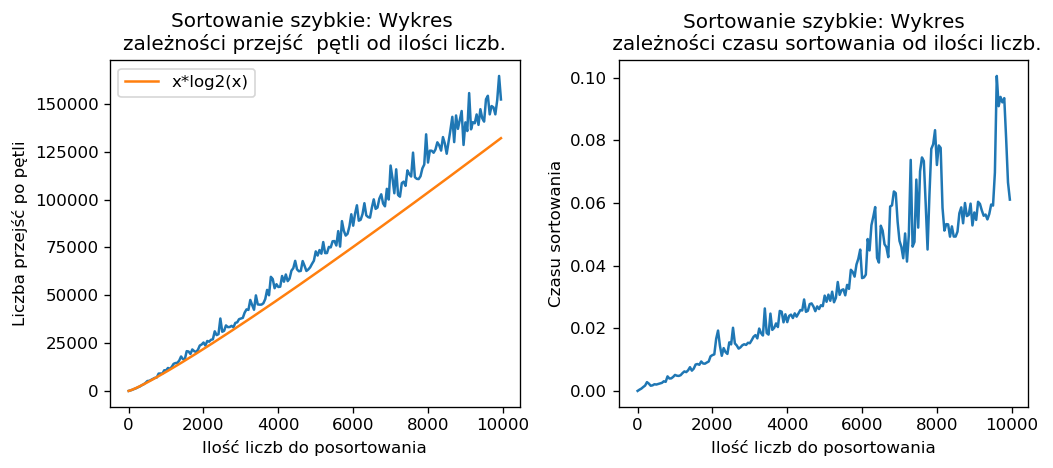

In [16]:
import random
from math import log
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# Zwraca indeks taki że, po lewej stronie są wartości mniejsze od niego, a po prawej większe.
def partition(tab, low, high):
    # Wybieram indeks high jako wartość względem której będę porównywał elementy i nazwę ją pivot.
    pivot = tab[high]
    # mid to indeks pivot, za którym będą znajdować się wartości większe od pivot.,
    #na początek ustawiam go na pierwszą wartość.s
    mid = low
    # Dla każdego elementu w zakresie low-high
    for i in range(low, high):
        global liczba_iteracji
        liczba_iteracji += 1
        # Jeżeli wartość w tablicy jest mniejsza od pivot
        if tab[i] < pivot:
            global liczba_zamian
            liczba_zamian +=1
            # Zamieniam miejscami w tablicy obecną wartość z mid
            tab[i], tab[mid] = tab[mid], tab[i]
            # zwiększam mid o 1
            mid+=1
    liczba_zamian+=1
    tab[mid], tab[high] = tab[high], tab[mid]
    return mid
            
    
def quicksort(tab, low, high):
    if low < high:
        mid = partition(tab,low,high)
        quicksort(tab,low,mid-1)
        quicksort(tab,mid+1,high)
        

def benchmark_3():
    lista_iteracji = []
    lista_zmian = []
    czasy = []
    ile = 10000
    rang = []
    for liczby in range(1,ile,50):
        global liczba_iteracji
        global liczba_zamian
        global tablica_przed_posortowaniem
        liczba_iteracji = 0
        liczba_zamian = 0
        #tablica_przed_posortowaniem = [random.randrange(1,1001) for i in range(1,liczby)]
        
        posort = list.copy(tablica_przed_posortowaniem[0:liczby])

        qstart = timer()
        quicksort(posort,0,len(posort)-1)
        qend = timer()
        rang.append(liczby)
        lista_iteracji.append(liczba_iteracji)
        lista_zmian.append(liczba_zamian)
        czasy.append(qend - qstart)
    
    width_in_inches = 9
    height_in_inches =4
    dots_per_inch = 120
    f = lambda x: x*log(x,2)
    xlogs = [f(x) for x in range(1, ile, 50)]
    plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    
    plt.subplot(1,2,1)
    plt.plot(rang, lista_iteracji)
    plt.plot(rang, xlogs, label="x*log2(x)")
    plt.title("Sortowanie szybkie: Wykres \nzależności przejść  pętli od ilości liczb.")
    plt.ylabel("Liczba przejść po pętli")
    plt.xlabel("Ilość liczb do posortowania")
    plt.legend(loc="best")
    #plt.yscale("log")
    
    plt.subplot(1,2,2)
    plt.plot(rang, czasy)
    plt.title("Sortowanie szybkie: Wykres\n zależności czasu sortowania od ilości liczb.")
    plt.ylabel("Czasy sortowania")
    plt.xlabel("Ilość liczb do posortowania")
    #plt.yscale("log")
    
    plt.tight_layout()
    plt.show()
    #print(lista_iteracji)
    #print(lista_zmian)
    #print(czasy)
        
liczba_iteracji = 0
liczba_zamian = 0
tablica_przed_posortowaniem = [random.randrange(0,10001) for i in range(1,10001)]
benchmark_3()

## Doświadczenie Q5
- Zakres licznb: 0-10000,
- Ilość liczb: od 1 do 10000,
- Sposób wybierania: prawie posortowane,

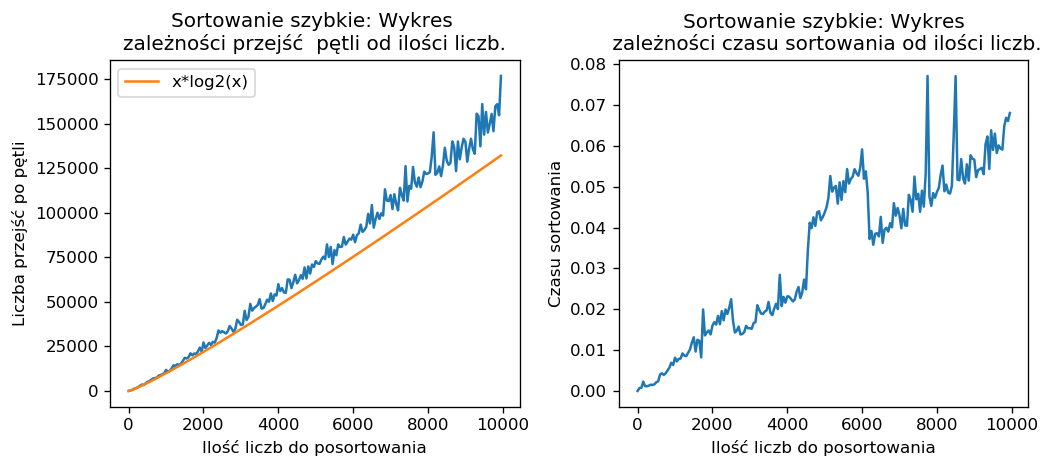

In [28]:
import random
from math import log
from timeit import default_timer as timer
import matplotlib.pyplot as plt

# Zwraca indeks taki że, po lewej stronie są wartości mniejsze od niego, a po prawej większe.
def partition(tab, low, high):
    # Wybieram indeks high jako wartość względem której będę porównywał elementy i nazwę ją pivot.
    pivot = tab[high]
    # mid to indeks pivot, za którym będą znajdować się wartości większe od pivot.,
    #na początek ustawiam go na pierwszą wartość.s
    mid = low
    # Dla każdego elementu w zakresie low-high
    for i in range(low, high):
        global liczba_iteracji
        liczba_iteracji += 1
        # Jeżeli wartość w tablicy jest mniejsza od pivot
        if tab[i] < pivot:
            global liczba_zamian
            liczba_zamian +=1
            # Zamieniam miejscami w tablicy obecną wartość z mid
            tab[i], tab[mid] = tab[mid], tab[i]
            # zwiększam mid o 1
            mid+=1
    liczba_zamian+=1
    tab[mid], tab[high] = tab[high], tab[mid]
    return mid
            
    
def quicksort(tab, low, high):
    if low < high:
        mid = partition(tab,low,high)
        quicksort(tab,low,mid-1)
        quicksort(tab,mid+1,high)
        

def benchmark_3():
    lista_iteracji = []
    lista_zmian = []
    czasy = []
    ile = 10000
    rang = []
    for liczby in range(1,ile,50):
        global liczba_iteracji
        global liczba_zamian
        global tablica_przed_posortowaniem
        liczba_iteracji = 0
        liczba_zamian = 0
        #tablica_przed_posortowaniem = [random.randrange(1,1001) for i in range(1,liczby)]
        
        posort = list.copy(tablica_przed_posortowaniem[0:liczby])

        qstart = timer()
        quicksort(posort,0,len(posort)-1)
        qend = timer()
        rang.append(liczby)
        lista_iteracji.append(liczba_iteracji)
        lista_zmian.append(liczba_zamian)
        czasy.append(qend - qstart)
    
    width_in_inches = 9
    height_in_inches =4
    dots_per_inch = 120
    f = lambda x: x*log(x,2)
    xlogs = [f(x) for x in range(1, ile, 50)]
    plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    
    plt.subplot(1,2,1)
    plt.plot(rang, lista_iteracji)
    plt.plot(rang, xlogs, label="x*log2(x)")
    plt.title("Sortowanie szybkie: Wykres \nzależności przejść  pętli od ilości liczb.")
    plt.ylabel("Liczba przejść po pętli")
    plt.xlabel("Ilość liczb do posortowania")
    plt.legend(loc="best")
    #plt.yscale("log")
    
    plt.subplot(1,2,2)
    plt.plot(rang, czasy)
    plt.title("Sortowanie szybkie: Wykres\n zależności czasu sortowania od ilości liczb.")
    plt.ylabel("Czasy sortowania")
    plt.xlabel("Ilość liczb do posortowania")
    #plt.yscale("log")
    
    plt.tight_layout()
    plt.show()
    #print(lista_iteracji)
    #print(lista_zmian)
    #print(czasy)
        
liczba_iteracji = 0
liczba_zamian = 0
tablica_przed_posortowaniem = [random.randrange(0,10001) for i in range(1,10001)]
for liczby in range(1,10000,50):
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
benchmark_3()

## Wnioski
- Jak widać po doświadczeniu Q3, algorytm ten w tej wersji nie radzi sobie dobrze z liczbami które są posortowane, ponieważ zawsze wybiera ostatnią liczbę a co za tym idzie, za każdym razem zmiejsza wielkość tablicy do posortowania tylko o 1. (Q3)
- Doświadczenia Q1 i Q2 pokazują że algorytm działa i sortuje liczby, zarówno ujemne jak i dodatnie. (Q1 i Q2)
- Algorytm bardzo dobrze radzi sobie z dużą liczbą losowych liczb, osiągając przy tym złożoność $ O(nlogn) $ (Q4)
- Jak widać dobrze sobie radzie z liczbami które są prawie posortowane (Q5)

# Sortowanie bąbelkowe
## Opis algorytmu
Sortowanie bąbelkowe to algorytm, który przechodzi od początku tablicy do jej końca porównując kolejne elementy i zamieniając je ze sobą jeżeli są w złej kolejności. W ten sposób na koniec tablicy trafia zawsze największa wartość z tej tablicy, dzięku temu kolejne wywołanie algorytmu przechodzi już tylko do przedostatniego elementu. Cykl ten się powtarza aż do posortowaniazostanie tylko jeden element.
## Kod

In [8]:
def bubbleSort(sorted_list):
    for nprzejscia in range(len(sorted_list)-1,0,-1):
        zamiana = False
        for i in range(nprzejscia):
            if sorted_list[i]>sorted_list[i+1]:
                sorted_list[i], sorted_list[i+1] = sorted_list[i+1], sorted_list[i]
                zamiana = True
        if not zamiana:
            break

## Schematy blokowe
![quicksort](Bubblesort/Bubble.png)
## Analiza matematyczna

## Przypadek optymistyczny
W tym przypadku algorytm sortuje posortowaną tablicę. Zatem już po pierwszym przejściu po tablicy z powodu braku zmian zakończy on działanie osiągają złożoność $ O(n) $.
## Pozostałe przypadki
W każdym pozostałym przypadku algorytm ten będzie osiągał złożoność $ O(n^{2}) $

# Doświadczenia:
## Doświadczenie B1
- Zakres liczb: -20-20,
- Ilość liczb: 10,
- Sposób wybierania: losowy

In [9]:
import random
tablica_przed_posortowaniem = [random.randrange(-20,21) for i in range(0,10)]

print("Przed posortowaniem: ")
print(tablica_przed_posortowaniem)

posort = list.copy(tablica_przed_posortowaniem)
bubbleSort(posort)

print("Sortowanie bąbelkowe: ")
print(posort)

Przed posortowaniem: 
[8, 14, 13, 9, 11, -14, -17, 17, 8, 15]
Sortowanie bąbelkowe: 
[-17, -14, 8, 8, 9, 11, 13, 14, 15, 17]


## Doświadczenie B2
- Zakres liczb: -1000-1000,
- Ilość liczb: 10 000,
- Sposób wybierania: losowy,

In [23]:
import random
from timeit import default_timer as timer
tablica_przed_posortowaniem = [random.randrange(-1000,1001) for i in range(0,10000)]
posort = list.copy(tablica_przed_posortowaniem)

qstart = timer()
bubbleSort(posort)
qend = timer()

print("Sortowanie bąbelkowe: "+str(qend - qstart)+ " sekund")

Sortowanie bąbelkowe: 22.77933370000028 sekund


## Doświadczenie B3
- Zakres licznb: 1-1000,
- Ilość liczb: od 1 do 1000,
- Sposób wybierania: posortowane,

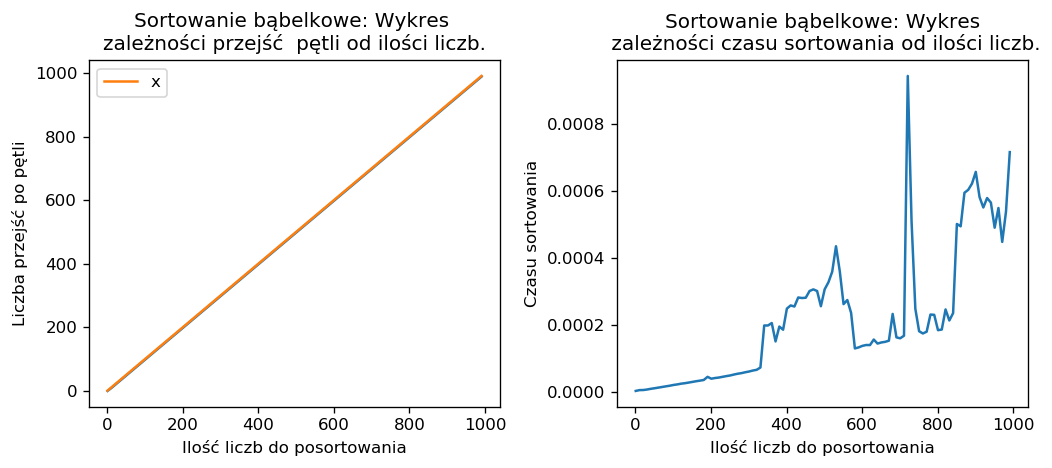

In [18]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib


def bubbleSort(sorted_list):
    global liczba_iteracji
    for nprzejscia in range(len(sorted_list)-1,0,-1):
        zamiana = False
        for i in range(nprzejscia):
            liczba_iteracji += 1
            if sorted_list[i]>sorted_list[i+1]:
                sorted_list[i], sorted_list[i+1] = sorted_list[i+1], sorted_list[i]
                zamiana = True
        if not zamiana:
            break
        
def benchmark_3():
    lista_iteracji = []
    lista_zmian = []
    czasy = []
    ile = 1000
    rang = []
    for liczby in range(1,ile,10):
        global liczba_iteracji
        global liczba_zamian
        liczba_iteracji = 0
        liczba_zamian = 0
        tablica_przed_posortowaniem = [i for i in range(1,liczby)]
        posort = list.copy(tablica_przed_posortowaniem)

        rang.append(liczby)
        qstart = timer()
        bubbleSort(posort)
        qend = timer()
        
        lista_iteracji.append(liczba_iteracji)
        lista_zmian.append(liczba_zamian)
        czasy.append(qend - qstart)
        
    width_in_inches = 9
    height_in_inches =4
    dots_per_inch = 120
    
    f = lambda x: x
    xlogs = [f(x) for x in range(1, ile, 10)]

    plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    
    plt.subplot(1,2,1)
    plt.plot(rang, lista_iteracji)
    plt.plot(rang, xlogs, label="x")
    plt.title("Sortowanie bąbelkowe: Wykres \nzależności przejść  pętli od ilości liczb.")
    plt.ylabel("Liczba przejść po pętli")
    plt.xlabel("Ilość liczb do posortowania")
    plt.legend(loc="best")
    
    plt.subplot(1,2,2)
    plt.plot(rang, czasy)
    plt.title("Sortowanie bąbelkowe: Wykres\n zależności czasu sortowania od ilości liczb.")
    plt.ylabel("Czasy sortowania")
    plt.xlabel("Ilość liczb do posortowania")
    
    plt.tight_layout()
    plt.show()
    #print(lista_iteracji)
    #print(lista_zmian)
    #print(czasy)
        
liczba_iteracji = 0
liczba_zamian = 0
benchmark_3()

## Doświadczenie B4
- Zakres licznb: 0-10000,
- Ilość liczb: od 1 do 5000,
- Sposób wybierania: losowe,

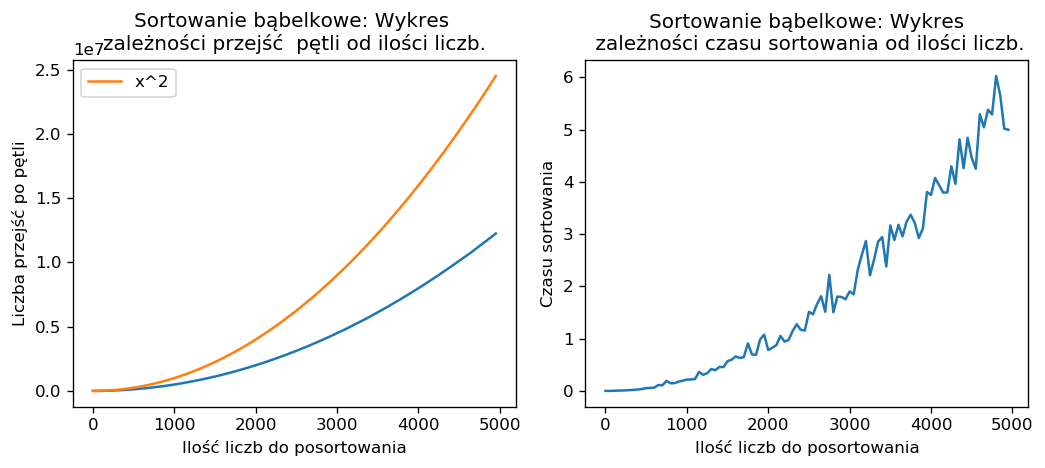

In [24]:
import random
from math import log
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def bubbleSort(sorted_list):
    global liczba_iteracji
    for nprzejscia in range(len(sorted_list)-1,0,-1):
        zamiana = False
        for i in range(nprzejscia):
            liczba_iteracji += 1
            if sorted_list[i]>sorted_list[i+1]:
                sorted_list[i], sorted_list[i+1] = sorted_list[i+1], sorted_list[i]
                zamiana = True
        if not zamiana:
            break
        

def benchmark_3():
    lista_iteracji = []
    lista_zmian = []
    czasy = []
    ile = 5000
    rang = []
    for liczby in range(1,ile,50):
        global liczba_iteracji
        global liczba_zamian
        global tablica_przed_posortowaniem
        liczba_iteracji = 0
        liczba_zamian = 0
        #tablica_przed_posortowaniem = [random.randrange(1,1001) for i in range(1,liczby)]
        
        posort = list.copy(tablica_przed_posortowaniem[0:liczby])

        qstart = timer()
        bubbleSort(posort)
        qend = timer()
        rang.append(liczby)
        lista_iteracji.append(liczba_iteracji)
        lista_zmian.append(liczba_zamian)
        czasy.append(qend - qstart)
    
    width_in_inches = 9
    height_in_inches =4
    dots_per_inch = 120
    f = lambda x: x*x
    xlogs = [f(x) for x in range(1, ile, 50)]
    plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    
    plt.subplot(1,2,1)
    plt.plot(rang, lista_iteracji)
    plt.plot(rang, xlogs, label="x^2")
    plt.title("Sortowanie bąbelkowe: Wykres \nzależności przejść  pętli od ilości liczb.")
    plt.ylabel("Liczba przejść po pętli")
    plt.xlabel("Ilość liczb do posortowania")
    plt.legend(loc="best")
    #plt.yscale("log")
    
    plt.subplot(1,2,2)
    plt.plot(rang, czasy)
    plt.title("Sortowanie bąbelkowe: Wykres\n zależności czasu sortowania od ilości liczb.")
    plt.ylabel("Czasy sortowania")
    plt.xlabel("Ilość liczb do posortowania")
    #plt.yscale("log")
    
    plt.tight_layout()
    plt.show()
    #print(lista_iteracji)
    #print(lista_zmian)
    #print(czasy)
        
liczba_iteracji = 0
liczba_zamian = 0
tablica_przed_posortowaniem = [random.randrange(0,10001) for i in range(1,5001)]
benchmark_3()

## Doświadczenie B5
- Zakres licznb: 0-10000,
- Ilość liczb: od 1 do 5000,
- Sposób wybierania: prawie posortowane,

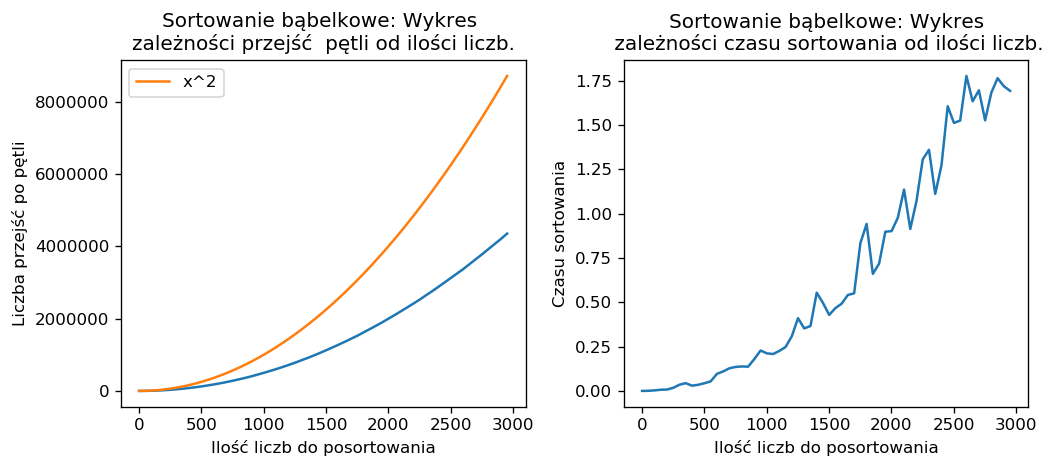

In [27]:
import random
from math import log
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def bubbleSort(sorted_list):
    global liczba_iteracji
    for nprzejscia in range(len(sorted_list)-1,0,-1):
        zamiana = False
        for i in range(nprzejscia):
            liczba_iteracji += 1
            if sorted_list[i]>sorted_list[i+1]:
                sorted_list[i], sorted_list[i+1] = sorted_list[i+1], sorted_list[i]
                zamiana = True
        if not zamiana:
            break
        

def benchmark_3():
    lista_iteracji = []
    lista_zmian = []
    czasy = []
    ile = 3000
    rang = []
    for liczby in range(1,ile,50):
        global liczba_iteracji
        global liczba_zamian
        global tablica_przed_posortowaniem
        liczba_iteracji = 0
        liczba_zamian = 0
        #tablica_przed_posortowaniem = [random.randrange(1,1001) for i in range(1,liczby)]
        
        posort = list.copy(tablica_przed_posortowaniem[0:liczby])

        qstart = timer()
        bubbleSort(posort)
        qend = timer()
        rang.append(liczby)
        lista_iteracji.append(liczba_iteracji)
        lista_zmian.append(liczba_zamian)
        czasy.append(qend - qstart)
    
    width_in_inches = 9
    height_in_inches =4
    dots_per_inch = 120
    f = lambda x: x*x
    xlogs = [f(x) for x in range(1, ile, 50)]
    plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    
    plt.subplot(1,2,1)
    plt.plot(rang, lista_iteracji)
    plt.plot(rang, xlogs, label="x^2")
    plt.title("Sortowanie bąbelkowe: Wykres \nzależności przejść  pętli od ilości liczb.")
    plt.ylabel("Liczba przejść po pętli")
    plt.xlabel("Ilość liczb do posortowania")
    plt.legend(loc="best")
    #plt.yscale("log")
    
    plt.subplot(1,2,2)
    plt.plot(rang, czasy)
    plt.title("Sortowanie bąbelkowe: Wykres\n zależności czasu sortowania od ilości liczb.")
    plt.ylabel("Czasu sortowania")
    plt.xlabel("Ilość liczb do posortowania")
    #plt.yscale("log")
    
    plt.tight_layout()
    plt.show()
    #print(lista_iteracji)
    #print(lista_zmian)
    #print(czasy)
        
liczba_iteracji = 0
liczba_zamian = 0
tablica_przed_posortowaniem = [random.randrange(0,10001) for i in range(1,3001)]
for liczby in range(1,3000,50):
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
    tablica_przed_posortowaniem[random.randrange(0,liczby)] = random.randrange(0,10001)
benchmark_3()

## Wnioski
- Algorytm dobrze sobie radzi ze sprawdzeniem czy liczby są posortowane (B3),
- Algorytm prawidłowo sortuje tablce, zarówno liczby dodatnie jak i ujemne (B1 B2),
- Jak widać na doświadczeniu B2 czas sortowania rośnie gwałtownie wraz ze wzrostem długości tablicy, wynika to z jego złożoności $O(n^{2})$
- Doświadczenia B4 i B5 pokazują, że niezależnie czy liczby są losowe czy prawie posortowane algorytm nadal wykona około $O(n^{2})$ iteracji.

# Podsumowanie

Jak wynika z powyższych doświadczeń, sortowanie szybkie jest znacznie bardziej wydajne. Jedyną jego wadą jest to, że zachowuje się jak bąbelkowe przy posortowanej tablicy, co wynika wyłącznie z tej implementacji, gdyż wybieram zawsze ostatnią liczbę jako tą względem której porównuję. W pozostałych przypadkach wprzedza bąbelkowe, co szczególnie widać na wykresach Q4 i B4. 